### Sortie vers Akur8

code : 
- Clémentine Vie
- Guillaume Gorge

In [53]:
#Chargement des packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

#Chemins
PATH_input_LF = "../../DATA/Top5 LF & Pricing Wakam/Données traitées/"
PATH_input_Wakam = "../../DATA/Top5 LF & Pricing Wakam/Pricé par Wakam/V3/Envoi 20230417/"
#Chemins
PATH_input_LF = "C:/Users/guill/GitHub/2023 Coherence Tarifaire/Data/"
PATH_input_Wakam = "C:/Users/guill/GitHub/2023 Coherence Tarifaire/Data/"
PATH_input_LFACP = 'C:/Users/guill/GitHub/2023 Ornikar Empreinte/Results/' 

In [54]:
#Table de référence pour les libellés correspondant à une couverture donnée
var = {
    "libelle_import": ["RC", "RC+", "TR"], 
    "sexy_title": ["1. Tiers", "2. Tiers Etendue", "3. Tous Risques"],
    }

couverture = ["tiers", "vol_incendie", "tous_risques"]
dico_couv = pd.DataFrame(var, index = couverture)
dico_couv

#    "primes_HT": ["prime_HT_tiers", "prime_HT_tiers_etendue", "prime_HT_tous_risques"], 
#    "primes_TTC": ["prime_TTC_tiers", "prime_TTC_tiers_etendue", "prime_TTC_tous_risques"]


,libelle_import,sexy_title
tiers,RC,1. Tiers
vol_incendie,RC+,2. Tiers Etendue
tous_risques,TR,3. Tous Risques


In [55]:
### Lecture de la base Furet qui donne les axes de l'ACP - voir code Guillaume Pricing Empreinte v7

In [56]:
LFACP = pd.read_csv(PATH_input_LFACP + "DonneesLeFuretWakamQuoteRetraiteACP.csv", index_col = 0, low_memory = False)
LFACP.head(15)
pandas_profiling.ProfileReport(LFACP, minimal=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1. Chargement données Les Furets pre-processed

In [57]:
#Fichier Les Furets pre-processed (déjà dédoublonné par date, moyenne de prix, position_vue)
LF = pd.read_csv(PATH_input_LF + "ornikar-2023-02-preprocessed.csv", index_col = 0, low_memory = False)
LF.head(15)

,date,id,assureur,mediane,moyenne,position_vue,prix,position_mer,devis,rappel,...,BDG_Incluse,BDG_Franchise_Montant,ASS_Panne_Incluse,ASS_Panne_Franchise_Montant,ASS_Accident_Incluse,ASS_Accident_Franchise_Montant,VR_Accident_Incluse,GC_Incluse,custom_offer_id,custom_qr_id
56832,2023-02-01,18931,Assureur 7,172.05,172.05,1,135.80,NaN,NaN,NaN,...,False,NaN,False,NaN,False,NaN,False,False,2023-02-01_172.05_1,2023-02-01_172.05
56833,2023-02-01,18931,Assureur 7,172.05,172.05,2,208.30,NaN,NaN,NaN,...,False,NaN,True,À partir de 0 km,True,À partir de 0 km,False,False,2023-02-01_172.05_2,2023-02-01_172.05
38722,2023-02-01,821,Assureur 10,191.71,191.18,1,114.26,NaN,NaN,NaN,...,False,NaN,True,À partir de 50 km,True,À partir de 0 km,False,True,2023-02-01_191.18_1,2023-02-01_191.18
38723,2023-02-01,821,Assureur 2,191.71,191.18,2,120.36,NaN,NaN,NaN,...,False,NaN,False,NaN,False,NaN,False,True,2023-02-01_191.18_2,2023-02-01_191.18
38724,2023-02-01,821,Assureur 7,191.71,191.18,3,126.40,NaN,NaN,NaN,...,False,NaN,False,NaN,False,NaN,False,False,2023-02-01_191.18_3,2023-02-01_191.18
38725,2023-02-01,821,Assureur 42,191.71,191.18,4,129.40,NaN,NaN,NaN,...,False,NaN,True,À partir de 25 km,True,À partir de 0 km,False,True,2023-02-01_191.18_4,2023-02-01_191.18
38726,2023-02-01,821,Assureur 20,191.71,191.18,5,135.36,NaN,NaN,NaN,...,False,NaN,False,NaN,False,NaN,False,True,2023-02-01_191.18_5,2023-02-01_191.18
62947,2023-02-01,25046,Assureur 15,187.47,194.26,1,125.43,NaN,NaN,NaN,...,False,NaN,False,NaN,False,NaN,False,True,2023-02-01_194.26_1,2023-02-01_194.26
62948,2023-02-01,25046,Assureur 10,187.47,194.26,2,133.16,NaN,NaN,NaN,...,False,NaN,True,À partir de 50 km,True,À partir de 0 km,False,True,2023-02-01_194.26_2,2023-02-01_194.26
62949,2023-02-01,25046,Assureur 42,187.47,194.26,3,137.66,NaN,NaN,NaN,...,False,NaN,True,À partir de 25 km,True,À partir de 0 km,False,True,2023-02-01_194.26_3,2023-02-01_194.26


In [58]:
# Attribuer un segment marketing
LF['segment'] = np.select(
    [
        (LF['auto_pri_his_bonus_taux'] <= 100) & (LF['annee_permis'] > 2020) & (LF['annee_naissance'] <= 2005) & (LF['annee_naissance'] >= 2002),
        (LF['auto_pri_his_bonus_taux'] <= 100) & (LF['annee_permis'] > 2020) & (LF['annee_naissance'] < 2002), 
        (LF['auto_pri_his_bonus_taux'] <= 100) & (LF['annee_permis'] <= 2020) & (LF['auto_pri_his_assur_anteced'] >=9),
        (LF['auto_pri_his_bonus_taux'] <= 100) & (LF['annee_permis'] <= 2020) & (LF['auto_pri_his_assur_anteced'] <9), 
    ], 
    [
        '1. Jeune permis - 18-21 ans', 
        '2. Jeune permis - > 21 ans',
        '3. Standard',
        '4. Sans Antécédent'
    ], 
    default= pd.NA
)

LF['segment'].value_counts()

3. Standard                    414817
4. Sans Antécédent             119944
1. Jeune permis - 18-21 ans     72199
2. Jeune permis - > 21 ans      64863
Name: segment, dtype: int64

In [59]:
list(LF.columns)

['date',
 'id',
 'assureur',
 'mediane',
 'moyenne',
 'position_vue',
 'prix',
 'position_mer',
 'devis',
 'rappel',
 'souscription',
 'id_externe_tarif',
 'couverture',
 'auto_veh_dtl_possession',
 'auto_veh_dtl_finan',
 'auto_veh_dtl_type_acquisition',
 'auto_veh_dtl_etat',
 'auto_pri_inf_prof',
 'auto_veh_usa_usage',
 'auto_veh_usa_pri_park',
 'auto_veh_usa_kilom',
 'auto_pri_don_car_duree',
 'auto_veh_dtl_titulaire',
 'auto_pri_inf_sexe',
 'auto_veh_garage_nt_departement_value',
 'code_postal',
 'code_postal_travail',
 'annee_permis',
 'auto_pri_don_permis_type',
 'auto_pri_inf_marital',
 'auto_pri_don_assur',
 'auto_pri_his_assure_actuel',
 'auto_pri_his_assur_anteced',
 'auto_pri_his_bonus_taux',
 'auto_pri_his_bonus_nb_annee',
 'auto_pri_his_nbr_sin',
 'auto_pri_his_resil_ass_motif',
 'auto_pri_his_resil',
 'auto_pri_don_annul',
 'auto_pri_his_stup',
 'auto_veh_dtl_second',
 'second_annee_naissance',
 'second_annee_permis',
 'auto_sec_his_bonus_taux',
 'auto_sec_don_assur',
 'au

In [60]:
# Dédoublonnage par custom_qr_id
LFnodup = LF.drop_duplicates('custom_qr_id')[['custom_qr_id', 'couverture_demandée', 'mediane', 'annee_naissance', 'segment']]
LFnodup['md_age'] = 2023 - LFnodup['annee_naissance']
LFnodup.shape

(146947, 6)

In [61]:
#Rang 1
LFrg1 =  LF.loc[LF['position_vue'] == 1][['custom_qr_id','prix']].drop_duplicates('custom_qr_id')
LFrg1.rename(columns = {'prix' : 'prix_rg1'}, inplace = True)
#Rang 3
LFrg3 =  LF.loc[LF['position_vue'] == 3][['custom_qr_id','prix']].drop_duplicates('custom_qr_id')
LFrg3.rename(columns = {'prix' : 'prix_rg3'}, inplace = True)
#Rang 5
LFrg5 =  LF.loc[LF['position_vue'] == 5][['custom_qr_id','prix']].drop_duplicates('custom_qr_id')
LFrg5.rename(columns = {'prix' : 'prix_rg5'}, inplace = True)

#Positionnement Direct Assurance
LFDA =  LF.loc[LF['assureur'].isin(["Assureur 10", "Assureur 46"])][['custom_qr_id','position_vue','prix']].sort_values(by = ['custom_qr_id','position_vue'])
LFDA.rename(columns = {'prix' : 'prix_DA', 'position_vue': 'position_DA'}, inplace = True)
LFDA.drop_duplicates('custom_qr_id', inplace = True)

In [62]:
#Consolidation des stats Les Furets
LFconso = LFnodup.merge(LFrg1, how = 'left', on = 'custom_qr_id').merge(LFrg3, how = 'left', on ='custom_qr_id').merge(LFrg5, how = 'left', on ='custom_qr_id').merge(LFDA, how = 'left', on = 'custom_qr_id')
LFconso.head(5)

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,prix_DA
0,2023-02-01_172.05,tiers,172.05,1956,3. Standard,67,135.80,NaN,NaN,NaN,NaN
1,2023-02-01_191.18,tiers,191.71,1967,3. Standard,56,114.26,126.40,135.36,1.0,114.26
2,2023-02-01_194.26,tiers,187.47,1982,3. Standard,41,125.43,137.66,161.22,2.0,133.16
3,2023-02-01_195.15,tiers,189.48,1986,3. Standard,37,122.70,128.40,143.89,1.0,122.70
4,2023-02-01_195.9,tiers,186.86,1967,3. Standard,56,115.70,136.08,150.02,NaN,NaN


### 2. Chargement des quote requests Les Furets pricées par Wakam

In [63]:
#Initialiser la table de gauche pour la jointure (données LesFurets)
df = LFconso

#Fichiers pricés par Wakam
for label, row in dico_couv.iterrows():
    PATH = PATH_input_Wakam + "All_Quote_Priced_02_2023_" + row["libelle_import"]
    df_temp = pd.read_csv(PATH + ".csv", index_col = 0, low_memory=False)
    df_temp.rename(columns = {'premium_HT' : ('primeHT_' + label), 'premium_TTC' : ('primeTTC_' + label)}, inplace = True)
    #Prime Pure Totale
    df_temp['PP_total' + label] = df_temp[[col for col in df_temp.columns if col.startswith('PP')]].sum(axis = 1)
    print(df_temp.shape)
    df = df.merge(df_temp[['IdClient', ('PP_total' + label), ('primeHT_' + label), ('primeTTC_' + label)]], how = 'left', right_on = 'IdClient', left_on = 'custom_qr_id')

df.shape

(146350, 57)
(146350, 57)
(146350, 57)


(146947, 23)

In [64]:
df.head(5)

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,...,primeHT_tiers,primeTTC_tiers,IdClient_y,PP_totalvol_incendie,primeHT_vol_incendie,primeTTC_vol_incendie,IdClient,PP_totaltous_risques,primeHT_tous_risques,primeTTC_tous_risques
0,2023-02-01_172.05,tiers,172.05,1956,3. Standard,67,135.80,NaN,NaN,NaN,...,159.94,211.98,2023-02-01_172.05,221.300497,187.06,249.89,2023-02-01_172.05,323.242366,294.05,377.01
1,2023-02-01_191.18,tiers,191.71,1967,3. Standard,56,114.26,126.40,135.36,1.0,...,94.17,124.22,2023-02-01_191.18,85.059486,118.89,158.95,2023-02-01_191.18,132.710333,208.61,266.85
2,2023-02-01_194.26,tiers,187.47,1982,3. Standard,41,125.43,137.66,161.22,2.0,...,NaN,NaN,2023-02-01_194.26,0.000000,NaN,NaN,2023-02-01_194.26,0.000000,NaN,NaN
3,2023-02-01_195.15,tiers,189.48,1986,3. Standard,37,122.70,128.40,143.89,1.0,...,117.23,151.40,2023-02-01_195.15,106.372067,127.82,168.44,2023-02-01_195.15,152.437919,196.43,250.51
4,2023-02-01_195.9,tiers,186.86,1967,3. Standard,56,115.70,136.08,150.02,NaN,...,112.53,147.64,2023-02-01_195.9,137.612689,115.86,155.35,2023-02-01_195.9,199.957713,194.63,250.44


### 3. Parmi les 3 formules tarifées par Wakam, identifier la prime Ornikar qui correspond à la couverture demandée

In [65]:
dist_prix = pd.DataFrame()

for label, row in dico_couv.iterrows():
    df_temp = df.loc[(df['couverture_demandée'] == label) & pd.notnull(df[('primeHT_' + label)])]
    col_prime = [col for col in df_temp.columns if col.startswith(('prime', 'PP'))]
    df_temp = df_temp[list(['custom_qr_id', 'segment'] + col_prime)]
    df_temp['prix_Ornikar_HT'] = df_temp[('primeHT_' + label)]
    df_temp['prix_Ornikar_TTC'] = df_temp[('primeTTC_' + label)]
    df_temp['PP_Ornikar'] = df_temp[('PP_total' + label)]
    dist_prix = pd.concat([dist_prix, df_temp])[['custom_qr_id', 'segment', 'prix_Ornikar_HT', 'prix_Ornikar_TTC', 'PP_Ornikar']]

dist_prix.shape


(103962, 5)

In [66]:
# Ajouter la prime Assistance au tarif Wakam

dico_prix_assistance = {
'1. Jeune permis - 18-21 ans': 21.6,
'2. Jeune permis - > 21 ans': 21.6,
'3. Standard': 17.5,
'4. Sans Antécédent': 25
}

dist_prix['prix_Ornikar_TTC_ya'] = dist_prix['prix_Ornikar_TTC']

for k,v in dico_prix_assistance.items() :
    filtre = (dist_prix['segment'] == k)
    dist_prix.loc[ filtre , 'prix_Ornikar_TTC_ya'] = dist_prix.loc[ filtre , 'prix_Ornikar_TTC_ya'] + v

In [67]:
dist_prix.drop(["segment"], axis = 1, inplace = True)
dist_prix.shape


(103962, 5)

In [68]:
# Table gauche : qr & couverture demandée

LFconso2 = LFconso.merge(dist_prix, on = 'custom_qr_id', how = "left")
LFconso2.head(5)

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,prix_DA,prix_Ornikar_HT,prix_Ornikar_TTC,PP_Ornikar,prix_Ornikar_TTC_ya
0,2023-02-01_172.05,tiers,172.05,1956,3. Standard,67,135.80,NaN,NaN,NaN,NaN,159.94,211.98,188.123139,229.48
1,2023-02-01_191.18,tiers,191.71,1967,3. Standard,56,114.26,126.40,135.36,1.0,114.26,94.17,124.22,71.560244,141.72
2,2023-02-01_194.26,tiers,187.47,1982,3. Standard,41,125.43,137.66,161.22,2.0,133.16,NaN,NaN,NaN,NaN
3,2023-02-01_195.15,tiers,189.48,1986,3. Standard,37,122.70,128.40,143.89,1.0,122.70,117.23,151.40,93.700841,168.90
4,2023-02-01_195.9,tiers,186.86,1967,3. Standard,56,115.70,136.08,150.02,NaN,NaN,112.53,147.64,120.313653,165.14


In [69]:
LFconso3 = LFconso2
LFconso3['Footprint_Wakam'] = (LFconso3.prix_Ornikar_HT.notnull()).astype(int)
LFconso3['Top5_Wakam'] = (LFconso3.prix_Ornikar_HT.notnull() & (LFconso3.prix_Ornikar_TTC_ya <= LFconso3.prix_rg5)).astype(int)
LFconso3['Top5_DA'] = (LFconso3.prix_DA.notnull()).astype(int)


In [70]:
stats_conso = LFconso3.groupby(['couverture_demandée', 'Footprint_Wakam', 'Top5_Wakam', 'Top5_DA']).size()


In [71]:
### Sortie Stat



### Analyse horticole (pomme de terre)
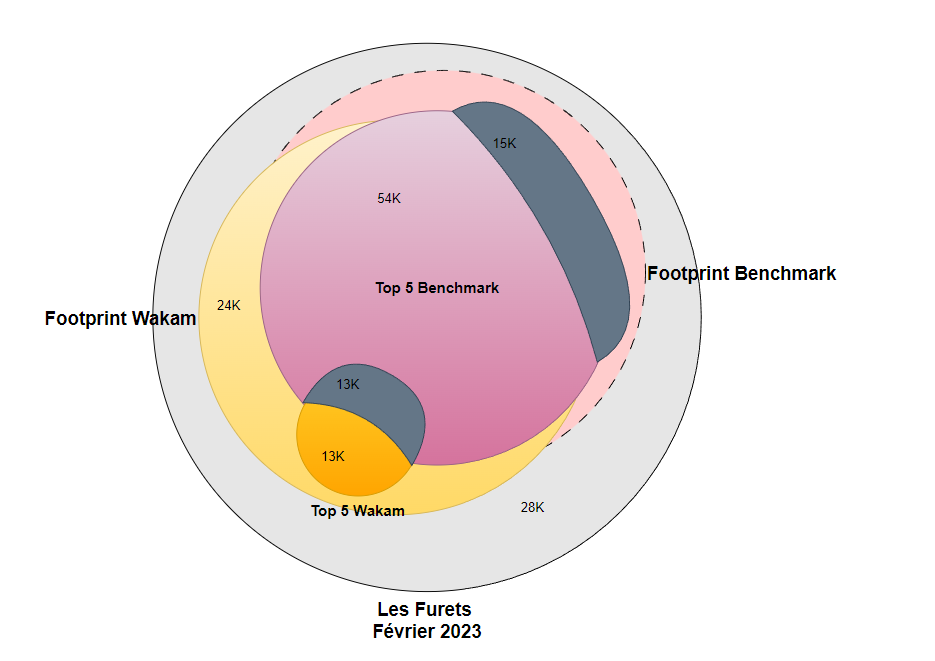

In [72]:
### Wakam non top 5 et Benchmark top 5

LFconso3['is_potato_top5benchmark_nottop5Wakam'] = (~(LFconso3['Top5_Wakam'])&(LFconso3['Top5_DA'])&(LFconso3['Footprint_Wakam']))
LFconso3['is_potato_top5wakam_nottop5benchmark'] = (~(LFconso3['Top5_DA'])&(LFconso3['Top5_Wakam'])&(LFconso3['Footprint_Wakam']))

In [73]:
LFconso3['is_potato_top5benchmark_nottop5Wakam'].value_counts()

0    93396
1    53551
Name: is_potato_top5benchmark_nottop5Wakam, dtype: int64

In [74]:
LFconso3['is_potato_top5wakam_nottop5benchmark'].value_counts()

0    133795
1     13152
Name: is_potato_top5wakam_nottop5benchmark, dtype: int64

In [75]:
LFconso3[(LFconso3['Top5_Wakam']==True)]

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,prix_DA,prix_Ornikar_HT,prix_Ornikar_TTC,PP_Ornikar,prix_Ornikar_TTC_ya,Footprint_Wakam,Top5_Wakam,Top5_DA,is_potato_top5benchmark_nottop5Wakam,is_potato_top5wakam_nottop5benchmark
5,2023-02-01_196.87,tiers,197.440000,1967,3. Standard,56,104.18,133.85200,152.41000,1.0,104.18,89.84,119.52,82.984688,137.02,1,1,1,0,0
6,2023-02-01_197.31,tiers,192.700000,1961,3. Standard,62,105.38,124.47000,146.76000,1.0,105.38,86.31,113.32,70.566234,130.82,1,1,1,0,0
7,2023-02-01_199.89,tiers,193.650000,1961,3. Standard,62,122.06,149.66000,157.18000,2.0,136.20,101.84,135.70,89.491856,153.20,1,1,1,0,0
9,2023-02-01_201.97,tiers,196.690000,1976,3. Standard,47,132.62,158.73000,162.91000,2.0,143.22,92.25,120.82,65.240654,138.32,1,1,1,0,0
13,2023-02-01_207.99,tiers,199.690000,1974,3. Standard,49,115.00,149.53000,156.35840,2.0,124.43,105.25,137.83,102.882970,155.33,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146904,2023-02-28_4363.64,vol_incendie,3708.140000,2003,1. Jeune permis - 18-21 ans,20,3507.74,3708.14000,5564.69000,NaN,NaN,1552.01,2019.67,1276.804508,2041.27,1,1,0,0,1
146905,2023-02-28_4409.47,tous_risques,4435.555005,1978,2. Jeune permis - > 21 ans,45,3744.50,4353.85000,4440.86001,3.0,4353.85,1547.18,1961.77,1990.750420,1983.37,1,1,1,0,0
146908,2023-02-28_4472.45,tous_risques,4317.530000,2005,1. Jeune permis - 18-21 ans,18,3426.46,3529.08001,4317.53000,1.0,3426.46,1929.20,2453.84,2600.739894,2475.44,1,1,1,0,0
146915,2023-02-28_4703.63,tous_risques,4529.490000,2005,1. Jeune permis - 18-21 ans,18,3481.21,3620.20001,4529.49000,1.0,3481.21,1966.57,2493.64,2555.865436,2515.24,1,1,1,0,0


In [87]:
LFconso4 = LFconso3.merge(LFACP, on = 'custom_qr_id', how = "left")

In [89]:
LFconso4

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,...,AxeACP11,AxeACP12,AxeACP13,AxeACP14,AxeACP15,AxeACP16,AxeACP17,AxeACP18,AxeACP19,AxeACP20
0,2023-02-01_172.05,tiers,172.05,1956,3. Standard,67,135.80,NaN,NaN,NaN,...,0.075592,0.094935,-0.410331,0.228518,-0.124222,0.149920,0.289152,0.212561,0.009399,0.105798
1,2023-02-01_191.18,tiers,191.71,1967,3. Standard,56,114.26,126.40,135.36,1.0,...,0.394162,-0.007953,-0.256037,0.471872,-0.156124,-0.874465,-0.241901,-0.335254,0.276348,0.051679
2,2023-02-01_194.26,tiers,187.47,1982,3. Standard,41,125.43,137.66,161.22,2.0,...,0.667510,-0.140578,-0.047357,-0.755165,-0.413629,-0.427799,0.914571,-0.390084,0.306412,0.043170
3,2023-02-01_195.15,tiers,189.48,1986,3. Standard,37,122.70,128.40,143.89,1.0,...,0.568252,-0.093082,0.017625,-1.099282,-0.089786,0.487312,-0.678949,-0.390049,0.212455,0.063693
4,2023-02-01_195.9,tiers,186.86,1967,3. Standard,56,115.70,136.08,150.02,NaN,...,0.254199,0.044941,-0.427796,0.866560,0.459728,-0.069838,-0.379216,0.568512,-0.188760,-0.636848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146942,2023-02-28_9229.19,tous_risques,9229.19,2000,2. Jeune permis - > 21 ans,23,9199.19,NaN,NaN,NaN,...,0.858782,1.292799,-0.242306,-0.333659,0.276278,-0.112719,-0.474380,0.410500,-0.293454,0.714280
146943,2023-02-28_9300.94,tous_risques,9300.94,2003,1. Jeune permis - 18-21 ans,20,9270.94,NaN,NaN,NaN,...,-0.584457,-0.925993,0.020618,0.233950,0.253901,0.024149,0.086416,0.211492,0.025890,-0.007133
146944,2023-02-28_9446.59,tous_risques,9446.59,1995,2. Jeune permis - > 21 ans,28,9416.59,NaN,NaN,NaN,...,0.557553,-0.792178,-0.470876,0.473624,0.554247,0.329622,0.839498,0.435160,-0.225591,0.855675
146945,2023-02-28_9723.08,tous_risques,9723.08,2004,1. Jeune permis - 18-21 ans,19,9693.08,NaN,NaN,NaN,...,-0.115399,-0.688818,-0.269723,0.569465,0.807062,0.048146,0.043512,0.435083,1.082737,-0.129145


In [88]:
# Export stats
file_path = PATH_input_LF + 'ExportLeFuretBaseTotale'
LFconso4.to_csv(file_path + '.csv')
file_path = PATH_input_LF + 'stats2'
stats_conso.to_csv(file_path + '.csv')

### 4. Comparaison à DA

In [77]:
# Comparer sur périmètre top 5 DA x Footprint Wakam
cpDA = LFconso2.loc[LFconso2.prix_Ornikar_HT.notnull() & LFconso2.prix_DA.notnull()]
cpDA.shape


(66640, 20)

In [78]:
# Comparer sur périmètre top 5 DA et pas top 5 Wakam
cpDA = LFconso2.loc[LFconso2.prix_Ornikar_HT.notnull() & (LFconso2.prix_Ornikar_TTC_ya > LFconso3.prix_rg5) & LFconso2.prix_DA.notnull()]
cpDA.shape


(53096, 20)

In [79]:
#Comparer à DA /!\ l'eLR Ornikar ne prend pas en compte l'assistance au dénominateur (car pas inclus dans la Prime HT)
cpDA['eLR_Ornikar'] = cpDA['PP_Ornikar'] / cpDA['prix_Ornikar_HT']
cpDA['eLR_DA'] = cpDA['PP_Ornikar'] / (cpDA['prix_DA'] * (cpDA['prix_Ornikar_HT'] / cpDA['prix_Ornikar_TTC']))
cpDA['ecart_euros_DA'] = cpDA['prix_Ornikar_TTC_ya'] - cpDA['prix_DA']
cpDA['ecart_pct_DA'] = cpDA['ecart_euros_DA'] / cpDA['prix_DA']

cpDA.head(5)

C:\Users\guill\AppData\Local\Temp\ipykernel_37756\2892516923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpDA['eLR_Ornikar'] = cpDA['PP_Ornikar'] / cpDA['prix_Ornikar_HT']
C:\Users\guill\AppData\Local\Temp\ipykernel_37756\2892516923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpDA['eLR_DA'] = cpDA['PP_Ornikar'] / (cpDA['prix_DA'] * (cpDA['prix_Ornikar_HT'] / cpDA['prix_Ornikar_TTC']))
C:\Users\guill\AppData\Local\Temp\ipykernel_37756\2892516923.py:4: SettingWithCopyWarning: 
A value is tryin

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,...,prix_Ornikar_TTC_ya,Footprint_Wakam,Top5_Wakam,Top5_DA,is_potato_top5benchmark_nottop5Wakam,is_potato_top5wakam_nottop5benchmark,eLR_Ornikar,eLR_DA,ecart_euros_DA,ecart_pct_DA
1,2023-02-01_191.18,tiers,191.71,1967,3. Standard,56,114.26,126.40000,135.36,1.0,...,141.72,1,0,1,1,0,0.759905,0.826146,27.46,0.240329
3,2023-02-01_195.15,tiers,189.48,1986,3. Standard,37,122.70,128.40000,143.89,1.0,...,168.90,1,0,1,1,0,0.799291,0.986248,46.20,0.376528
10,2023-02-01_202.57,tiers,196.95,1962,3. Standard,61,117.61,141.17001,158.75,1.0,...,172.49,1,0,1,1,0,0.932997,1.229532,54.88,0.466627
15,2023-02-01_208.36,tiers,197.56,1959,3. Standard,64,137.56,150.71000,153.57,1.0,...,196.56,1,0,1,1,0,1.476158,1.921495,59.00,0.428904
16,2023-02-01_209.52,tiers,192.96,1980,3. Standard,43,109.85,129.30000,172.50,1.0,...,185.74,1,0,1,1,0,1.077090,1.649610,75.89,0.690851


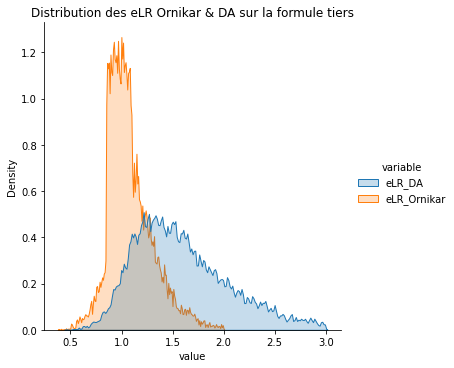

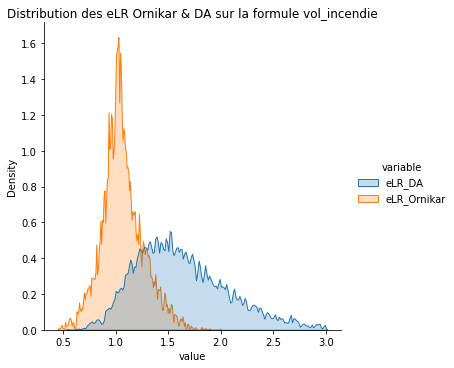

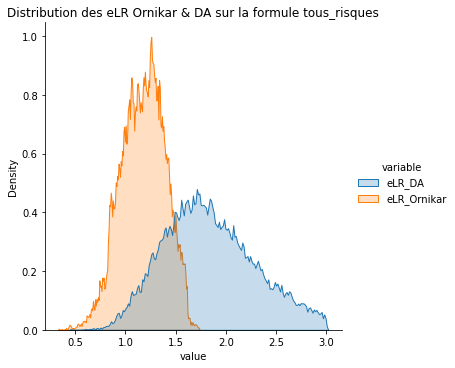

In [80]:
cpDA_tr = cpDA[['custom_qr_id', 'couverture_demandée', 'eLR_DA', 'eLR_Ornikar']].melt(id_vars = ['couverture_demandée', 'custom_qr_id'])
cpDA_tr.head(5)

# Distribution des eLR DA & Ornikar par couverture
def graph_cover(cover):
    df_temp = cpDA_tr.loc[cpDA_tr['couverture_demandée'] == cover]
    g = sns.displot(
        data = df_temp[(df_temp['value']).between(0,3) ], x = "value", hue = 'variable', kind = "kde", bw_adjust = .10, fill = True 
    )
    plt.title("Distribution des eLR Ornikar & DA sur la formule " + cover)
    print(g)

graph_cover("tiers")
graph_cover("vol_incendie")
graph_cover("tous_risques") 

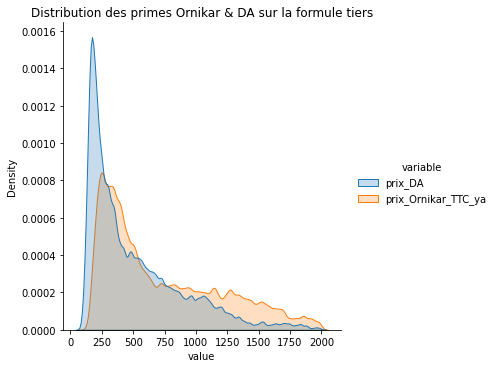

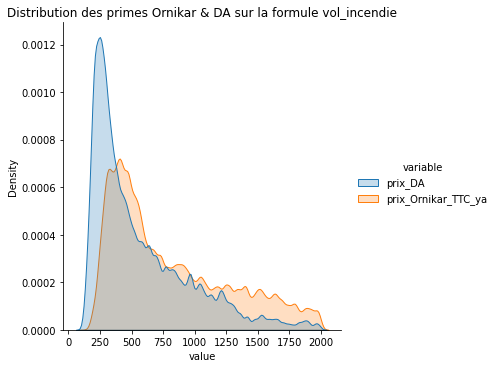

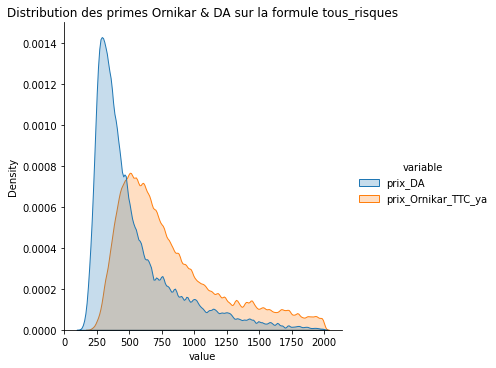

In [81]:
cpDA_tr = cpDA[['custom_qr_id', 'couverture_demandée', 'prix_DA', 'prix_Ornikar_TTC_ya']].melt(id_vars = ['couverture_demandée', 'custom_qr_id'])
cpDA_tr.head(5)

# Distribution des primes DA & Ornikar par couverture
def graph_cover(cover):
    df_temp = cpDA_tr.loc[cpDA_tr['couverture_demandée'] == cover]
    g = sns.displot(
        data = df_temp[(df_temp['value']).between(0,2000) ], x = "value", hue = 'variable', kind = "kde", bw_adjust = .25, fill = True 
    )
    plt.title("Distribution des primes Ornikar & DA sur la formule " + cover)
    print(g)

graph_cover("tiers")
graph_cover("vol_incendie")
graph_cover("tous_risques") 

,count,mean,std,min,25%,50%,75%,max
couverture_demandée,,,,,,,,
tiers,13833.0,245.0,201.0,0.0,100.0,177.0,337.0,1507.0
tous_risques,32165.0,308.0,207.0,-742.0,164.0,251.0,388.0,1632.0
vol_incendie,7098.0,302.0,236.0,0.0,128.0,225.0,419.0,1421.0


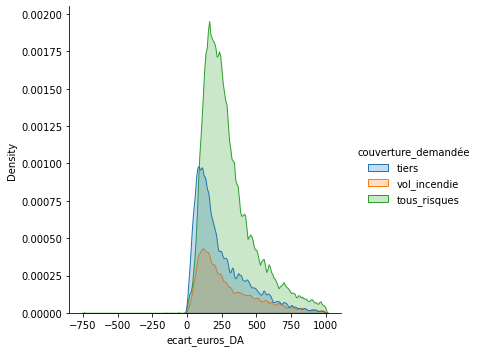

In [82]:
# Distance à DA en euros
g = sns.displot(
        data = cpDA[(cpDA['ecart_euros_DA']).between(-1000,1000) ], x = "ecart_euros_DA", hue = 'couverture_demandée', kind = "kde", bw_adjust = .25, fill = True 
    )
display(g)
cpDA.groupby('couverture_demandée')['ecart_euros_DA'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
couverture_demandée,,,,,,,,
tiers,13833.0,0.56,0.34,0.00,0.30,0.50,0.75,2.72
tous_risques,32165.0,0.66,0.40,-0.63,0.39,0.60,0.86,4.95
vol_incendie,7098.0,0.60,0.36,0.00,0.34,0.53,0.79,2.81


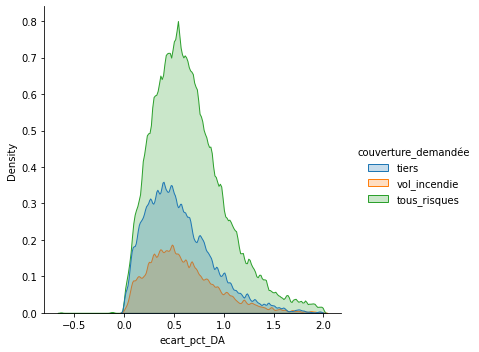

In [83]:
# Distance à DA en %
g = sns.displot(
        data = cpDA[(cpDA['ecart_pct_DA']).between(-2,2) ], x = "ecart_pct_DA", hue = 'couverture_demandée', kind = "kde", bw_adjust = .25, fill = True 
    )
display(g)
cpDA.groupby('couverture_demandée')['ecart_pct_DA'].describe().round(2)

In [84]:
cpDA2

,custom_qr_id,couverture_demandée,mediane,annee_naissance,segment,md_age,prix_rg1,prix_rg3,prix_rg5,position_DA,...,prix_Ornikar_TTC_ya,Footprint_Wakam,Top5_Wakam,Top5_DA,eLR_Ornikar,eLR_DA,ecart_euros_DA,ecart_pct_DA,date,is_potato_top5benchmark_nottop5Wakam
1,2023-02-01_191.18,tiers,191.710000,1967,3. Standard,56,114.26,126.40000,135.36000,1.0,...,141.72,1,0,1,0.759905,0.826146,27.46,0.240329,2023,1
3,2023-02-01_195.15,tiers,189.480000,1986,3. Standard,37,122.70,128.40000,143.89000,1.0,...,168.90,1,0,1,0.799291,0.986248,46.20,0.376528,2023,1
10,2023-02-01_202.57,tiers,196.950000,1962,3. Standard,61,117.61,141.17001,158.75000,1.0,...,172.49,1,0,1,0.932997,1.229532,54.88,0.466627,2023,1
15,2023-02-01_208.36,tiers,197.560000,1959,3. Standard,64,137.56,150.71000,153.57000,1.0,...,196.56,1,0,1,1.476158,1.921495,59.00,0.428904,2023,1
16,2023-02-01_209.52,tiers,192.960000,1980,3. Standard,43,109.85,129.30000,172.50000,1.0,...,185.74,1,0,1,1.077090,1.649610,75.89,0.690851,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146535,2023-02-28_2257.64,tous_risques,2229.090010,2004,1. Jeune permis - 18-21 ans,19,2107.38,2191.46001,2368.81000,1.0,...,2481.16,1,0,1,1.287347,1.502485,373.78,0.177367,2023,1
146576,2023-02-28_2325.63,tous_risques,2495.055000,1998,3. Standard,25,1400.18,1436.89000,1483.79001,1.0,...,1783.20,1,0,1,0.889607,1.121841,383.02,0.273551,2023,1
146659,2023-02-28_2526.07,tous_risques,2017.500005,1997,2. Jeune permis - > 21 ans,26,1781.33,1923.62000,2057.91001,3.0,...,2284.65,1,0,1,1.184854,1.393926,361.03,0.187683,2023,1
146668,2023-02-28_2549.95,tous_risques,1682.040010,1989,2. Jeune permis - > 21 ans,34,1154.20,1587.12000,1682.04001,3.0,...,1981.84,1,0,1,0.911142,1.125344,394.72,0.248702,2023,1


In [85]:
# Export final
file_path = PATH_input_LF + 'stats'

cpDA2 = cpDA
cpDA2['date'] = 2023

cpDA.to_csv(file_path + '.csv')

C:\Users\guill\AppData\Local\Temp\ipykernel_37756\3581406377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpDA2['date'] = 2023
